# Import statements

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import sys
import time
import os
import random
# np.set_printoptions(threshold=sys.maxsize)

# utility functions

In [2]:
def write_to_file(filename, data):
    with open(filename, "w") as file:
        for element in data:
            file.write(f"{element}\n")

In [3]:
def plot_the_scores(plot_values):
    """
    For plotting the utilities of the grid through the iteration of the agent's algorithm.
    """
    plt.plot(plot_values, label=f"Scores")

    plt.xlabel("Iterations")
    plt.ylabel("Utilities")
    plt.title("Utilities against Iterations for Each Position")
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    plt.show()

# PageRank algorithms

## Simplified pagerank

In [4]:
def page_rank_simplified(adjacency_matrix, max_iterations=1000):
    # For plotting purposes
    plot_scores = []

    # Initialize the PageRank scores with equal probabilities (random surfers)
    number_of_nodes = adjacency_matrix.shape[0]
    page_rank_scores = np.ones(number_of_nodes) / number_of_nodes

    print(f"initial page_rank_scores:{page_rank_scores}")

    # Iteratively update the PageRank scores
    for i in range(max_iterations):
        # Perform the matrix-vector multiplication
        new_page_rank_scores = adjacency_matrix.T.dot(page_rank_scores)

        # Check for convergence
        if np.allclose(page_rank_scores, new_page_rank_scores):
            print(f"convergence reached")
            break

        # For plotting
        plot_scores.append(page_rank_scores.round(4).tolist())

        page_rank_scores = new_page_rank_scores

        if np.isnan(new_page_rank_scores).any():
            print(f"iteration:{i}")

    return page_rank_scores, plot_scores, i

## Random surfer model pagerank

In [5]:
def page_rank_random_surfer_model(adjacency_matrix, teleportation_probability, max_iterations=100, threshold=0.0):
    plot_scores = []

    # Initialize the PageRank scores with equal probabilities (random surfers)
    number_of_nodes = adjacency_matrix.shape[0]
    page_rank_scores = np.ones(number_of_nodes) / number_of_nodes

    print(f"initial page_rank_scores:{page_rank_scores}")

    # Iteratively update the PageRank scores
    for i in range(max_iterations):
        # Perform the matrix-vector multiplication
        new_page_rank_scores = adjacency_matrix.T.dot(page_rank_scores)

        # Add the teleportation probability
        new_page_rank_scores = (teleportation_probability * 1 / number_of_nodes) + ((1 - teleportation_probability) * new_page_rank_scores)
        # Check for convergence
        if np.linalg.norm(page_rank_scores - new_page_rank_scores) < threshold:
            break

        plot_scores.append(page_rank_scores.round(4).tolist())
        page_rank_scores = new_page_rank_scores

    return page_rank_scores, plot_scores, i

## modified pagerank with teleportation and distribution vector

In [6]:
def modified_page_rank(adjacency_matrix, teleportation_probability, boredom_distribution, max_iterations=100):
    plot_scores = []

    # Initialize the PageRank scores with equal probabilities (random surfers)
    number_of_nodes = adjacency_matrix.shape[0]
    page_rank_scores = np.ones(number_of_nodes) / number_of_nodes

    print(f"initial page_rank_scores:{page_rank_scores}")

    # Iteratively update the PageRank scores
    for i in range(max_iterations):
        # Perform the matrix-vector multiplication
        new_page_rank_scores = adjacency_matrix.T.dot(page_rank_scores)

        # Add the teleportation probability
        new_page_rank_scores = (teleportation_probability * boredom_distribution) + ((1 - teleportation_probability) * new_page_rank_scores)
        # Check for convergence
        if np.allclose(page_rank_scores, new_page_rank_scores):
            break

        plot_scores.append(page_rank_scores.tolist())

        page_rank_scores = new_page_rank_scores

    return page_rank_scores, plot_scores, i

# Proof of convergence with Example from lecture notes 7 page 53

## Graph set up

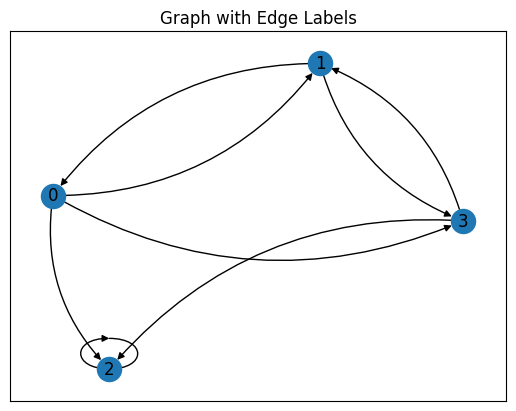

In [7]:
# Transition matrix of above graph
lecture_notes_example_adjacency_matrix = np.array([[0, 1 / 2, 0, 0], [1 / 3, 0, 0, 1 / 2], [1 / 3, 0, 1, 1 / 2], [1 / 3, 1 / 2, 0, 0]])
lecture_notes_example_adjacency_matrix = np.transpose(lecture_notes_example_adjacency_matrix)

G = nx.from_numpy_array(lecture_notes_example_adjacency_matrix, create_using=nx.DiGraph)

fig, ax = plt.subplots()
pos = nx.spring_layout(G, seed=5)
nx.draw_networkx_nodes(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)
nx.draw_networkx_edges(G, pos, ax=ax, connectionstyle=f"arc3, rad = {0.25}")
plt.title("Graph with Edge Labels")
plt.show()

## Proofs

In [8]:
page_ranks, simplified_pagerank_lecture_notes_example_plot_scores, no_of_iteration = page_rank_simplified(lecture_notes_example_adjacency_matrix)
print(f"closed form 1: {page_ranks.round(2)}")
print(f"closed form 2: {page_ranks.sum().round(2)}")
print(f"no_of_iteration: {no_of_iteration}")

initial page_rank_scores:[0.25 0.25 0.25 0.25]
convergence reached
closed form 1: [0. 0. 1. 0.]
closed form 2: 1.0
no_of_iteration: 51


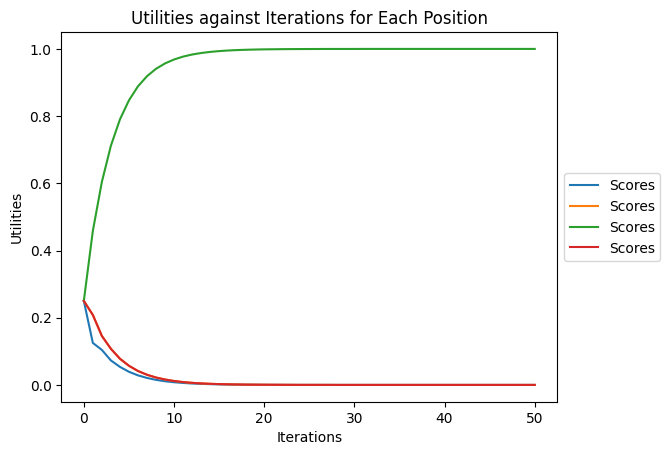

In [9]:
write_to_file("./results/simplified_page_rank_scores_lecture_notes_example.txt", simplified_pagerank_lecture_notes_example_plot_scores)
plot_the_scores(simplified_pagerank_lecture_notes_example_plot_scores)

In [10]:
page_ranks, random_surfer_model_pagerank_lecture_notes_example_plot_scores, no_of_iteration = page_rank_random_surfer_model(lecture_notes_example_adjacency_matrix, 0.15)
print(f"closed form 1: {page_ranks.round(2)}")
print(f"closed form 2: {page_ranks.sum().round(2)}")
print(f"no_of_iteration: {no_of_iteration}")

initial page_rank_scores:[0.25 0.25 0.25 0.25]
closed form 1: [0.08 0.11 0.71 0.11]
closed form 2: 1.0
no_of_iteration: 99


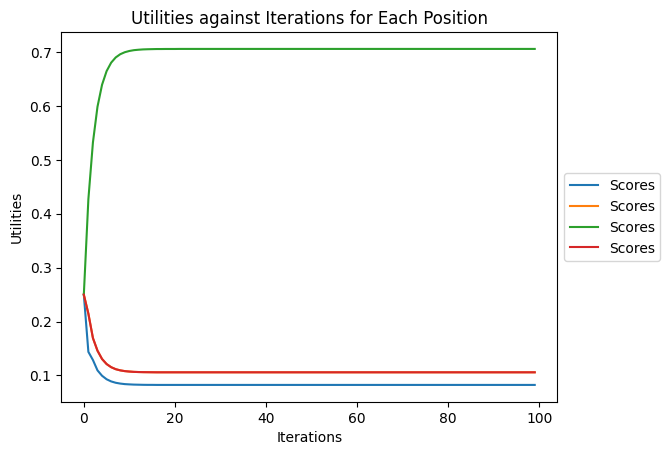

In [11]:
write_to_file("./results/random_surfer_page_rank_scores_lecture_notes_example.txt", random_surfer_model_pagerank_lecture_notes_example_plot_scores)
plot_the_scores(random_surfer_model_pagerank_lecture_notes_example_plot_scores)

In [12]:
E = np.ones(lecture_notes_example_adjacency_matrix.shape[0]) / lecture_notes_example_adjacency_matrix.shape[0]
page_ranks, modified_pagerank_lecture_notes_example_plot_scores, no_of_iteration = modified_page_rank(lecture_notes_example_adjacency_matrix, 0.15, E)
print(f"closed form 1: {page_ranks.round(2)}")
print(f"closed form 2: {page_ranks.sum().round(2)}")
print(f"no_of_iteration: {no_of_iteration}")

initial page_rank_scores:[0.25 0.25 0.25 0.25]
closed form 1: [0.08 0.11 0.71 0.11]
closed form 2: 1.0
no_of_iteration: 23


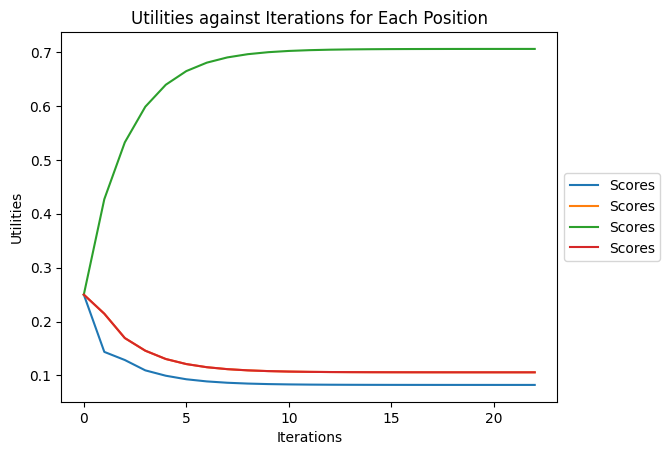

In [13]:
write_to_file("./results/modified_page_rank_scores_lecture_notes_example.txt", modified_pagerank_lecture_notes_example_plot_scores)
plot_the_scores(modified_pagerank_lecture_notes_example_plot_scores)

# Parameter exploration of PageRank algorithm

## Experiment set up

In [14]:
def generate_input_data(num_nodes, num_edges, file_name):
    nodes = [f"n {i}" for i in range(num_nodes)]
    edges = [f"e {random.randint(0, num_nodes-1)} {random.randint(0, num_nodes-1)}" for _ in range(num_edges)]
    directed_edges = [f"e {random.randint(0, num_nodes-1)} {random.randint(0, num_nodes-1)}" for _ in range(num_edges)]
    input_data =  nodes + directed_edges
    with open(f"{file_name}.txt", "w") as f:
        for line in input_data:
            f.write(f"{line}\n")

def parse_dataset(file_path):
    nodes = set()
    edges = []

    with open(file_path, "r") as file:
        for line in file:
            parts = line.split()
            if parts[0] == "n":
                nodes.add(int(parts[1]))
            elif parts[0] == "e":
                edges.append((int(parts[1]), int(parts[2])))

    return nodes, edges

def create_adjacency_matrix(nodes, edges):
    num_nodes = max(nodes) + 1
    adjacency_matrix = np.zeros((num_nodes, num_nodes))

    for edge in edges:
        adjacency_matrix[edge[0]][edge[1]] = 1

    for i in range(len(adjacency_matrix)):
        row = adjacency_matrix[i]
        row_sum = sum(row)

        for j in range(len(row)):
            if row_sum != 0:
                adjacency_matrix[i][j] = row[j] / row_sum

    return adjacency_matrix

def create_adjacency_matrix_replace_dead_nodes(nodes, edges):
    num_nodes = max(nodes) + 1
    adjacency_matrix = np.zeros((num_nodes, num_nodes))

    for edge in edges:
        adjacency_matrix[edge[0]][edge[1]] = 1

    for i in range(len(adjacency_matrix)):
        row = adjacency_matrix[i]
        row_sum = sum(row)

        for j in range(len(row)):
            if row_sum != 0:
                adjacency_matrix[i][j] = row[j] / row_sum
            else:
                adjacency_matrix[i][j] = 1 / num_nodes

    return adjacency_matrix

def create_adjacency_matrix_drop_dangling(nodes, edges):
    num_nodes = max(nodes) + 1
    adjacency_matrix = np.zeros((num_nodes, num_nodes))

    for edge in edges:
        adjacency_matrix[edge[0]][edge[1]] = 1

    # recursively drop dead nodes. dropping one node can cause another which linked only to it to become a dead end
    def drop_dead_nodes(matrix):
        dead_nodes = []
        for i in range(len(matrix)):
            row = matrix[i]
            if np.sum(row) == 0:
                dead_nodes.append(i)
        if len(dead_nodes) == 0:
            return matrix
        else:
            matrix = np.delete(matrix, dead_nodes, axis=0)
            matrix = np.delete(matrix, dead_nodes, axis=1)
            return drop_dead_nodes(matrix)

    adjacency_matrix = drop_dead_nodes(adjacency_matrix)

    for i in range(len(adjacency_matrix)):
        row = adjacency_matrix[i]
        row_sum = np.sum(row)
        if row_sum != 0:
            adjacency_matrix[i] = row / row_sum

    return adjacency_matrix, None

def create_adjacency_list_replace(nodes, edges):
    adjacency_list = {node: [] for node in nodes}

    for edge in edges:
        source, destination = edge
        adjacency_list[source].append(destination)

    # handle dangling links by replacing them with links to all nodes
    num_nodes = len(adjacency_list)
    dead_nodes = [node for node in nodes if not adjacency_list[node]]
    if dead_nodes:
        for dead_node in dead_nodes:
            adjacency_list[dead_node] = list(adjacency_list.keys())
            adjacency_list[dead_node].remove(dead_node)
    print(f"dead_nodes:{dead_nodes}")
    return adjacency_list

def create_adjacency_list_remove(nodes, edges):
    adjacency_list = {node: [] for node in nodes}

    for edge in edges:
        source, destination = edge
        adjacency_list[source].append(destination)

    # handle dangling links by removing nodes with no outlinks
    adjacency_list_new = {node: outlinks for node, outlinks in adjacency_list.items() if outlinks}
    
    return adjacency_list_new

## Experimentation with larger graphs

In [15]:
# desired_num_nodes = 20
# desired_num_edges = 40
# # Ensure num_edges is less than or equal to num_nodes^2 to avoid creating more edges than possible in a directed graph.
# num_edges = min(desired_num_edges, desired_num_nodes**2)
# generate_input_data(desired_num_nodes, desired_num_edges, "medium_graph")

In [16]:
# # Dataset source: https://www.cs.cornell.edu/courses/cs685/2002fa/data/gr0.epa
# file_path = './datasets/gr0.epa_sample.txt'
# file_path = './datasets/gr0.epa_sample_dangling.txt'
# file_path = './datasets/gr0.epa_sample_dangling_2.txt'
# file_path = "./datasets/gr0.epa.txt"
# file_path = "./datasets/lecture_example.txt"
file_path = "./datasets/medium_graph.txt"
nodes, edges = parse_dataset(file_path)

In [17]:
# graph creation
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

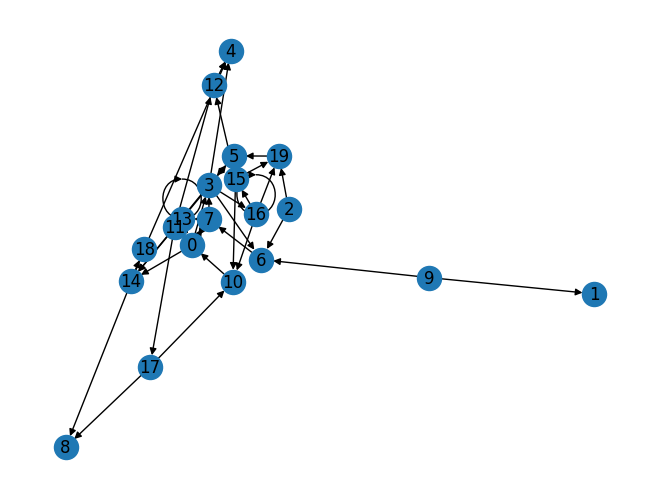

In [18]:
nx.draw(G, with_labels=True)

## Web matrix

### normal adjacency matrix

In [19]:
adjacency_matrix = create_adjacency_matrix(nodes, edges)

In [20]:
E = np.ones(adjacency_matrix.shape[0]) / adjacency_matrix.shape[0]
page_ranks, normal_web_matrix_simplified_pagerank_plot_scores, no_of_iterations = page_rank_simplified(adjacency_matrix)
print(f"closed form 1: {page_ranks}")
print(f"closed form 2: {page_ranks.sum()}") # NOT converged to 1!
print(f"no_of_iterations: {no_of_iterations}")

initial page_rank_scores:[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
convergence reached
closed form 1: [2.87521244e-08 0.00000000e+00 0.00000000e+00 4.25312584e-08
 4.26688800e-08 1.47974562e-08 1.33214431e-08 2.86973978e-08
 2.45962325e-08 0.00000000e+00 1.01850273e-08 4.00707595e-09
 5.04736018e-09 1.59916967e-08 2.93359948e-08 6.07538408e-09
 1.93968272e-08 2.51015542e-09 3.67539359e-08 8.61258884e-09]
closed form 2: 3.3328083864285925e-07
no_of_iterations: 67


### remove dead nodes recursively in web matrix

In [21]:
adjacency_matrix, dropped_nodes = create_adjacency_matrix_drop_dangling(nodes, edges)

In [22]:
page_ranks, remove_deadnodes_web_matrix_simplified_pagerank_plot_scores, no_of_iterations = page_rank_simplified(adjacency_matrix)
print(f"closed form 1: {page_ranks}")
print(f"closed form 2: {page_ranks.sum()}")
print(f"no_of_iterations: {no_of_iterations}")

initial page_rank_scores:[0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857]
convergence reached
closed form 1: [0.13411761 0.         0.18352845 0.06352914 0.09176466 0.15882395
 0.         0.06352976 0.01764699 0.07058827 0.03058846 0.12235312
 0.01764701 0.04588258]
closed form 2: 0.9999999999999994
no_of_iterations: 36


### replace deadnodes with special nodes

In [23]:
adjacency_matrix = create_adjacency_matrix_replace_dead_nodes(nodes, edges)

In [24]:
E = np.ones(adjacency_matrix.shape[0]) / adjacency_matrix.shape[0]
page_ranks, replace_deadnodes_web_matrix_simplified_pagerank_plot_scores, no_of_iterations = page_rank_simplified(adjacency_matrix)
print(f"closed form 1: {page_ranks}")
print(f"closed form 2: {page_ranks.sum()}")
print(f"no_of_iterations: {no_of_iterations}")

initial page_rank_scores:[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
convergence reached
closed form 1: [0.0848353  0.01354905 0.00903269 0.11755794 0.10644039 0.05199119
 0.04745502 0.08476589 0.06066567 0.00903269 0.03822517 0.01835469
 0.02549009 0.0466101  0.07602274 0.02184004 0.05122964 0.01821006
 0.08505521 0.03363644]
closed form 2: 1.0000000000000002
no_of_iterations: 23


In [25]:
z = nx.pagerank(G, 0.85)
print(f"pagerank results:\n {z}")
print(f"sum of page ranks: {sum(z.values())}")

pagerank results:
 {0: 0.08173592725914842, 1: 0.021190200337731762, 2: 0.01487032083159089, 3: 0.10799133348940787, 4: 0.0958114237382617, 5: 0.0553374238824536, 6: 0.05045810965555187, 7: 0.08091772010946638, 8: 0.056420100632845215, 9: 0.01487032083159089, 10: 0.042584350217989786, 11: 0.022611949444460846, 12: 0.03158510861054446, 13: 0.0455389822421385, 14: 0.06871827073163259, 15: 0.025075277431769558, 16: 0.04802330724344879, 17: 0.0244802917494931, 18: 0.07327960776151211, 19: 0.038499973798961785}
sum of page ranks: 1.0


## Teleportation probability

In [26]:
adjacency_matrix = create_adjacency_matrix_replace_dead_nodes(nodes, edges)

In [27]:
pagerank_15_percent, pagerank_15_percent_plot_scores, pagerank_15_percent_no_of_iteration = page_rank_random_surfer_model(adjacency_matrix, 0.15)
print(f"closed form 1: {pagerank_15_percent}")
print(f"closed form 2: {pagerank_15_percent.sum()}")
print(f"max value: {np.max(pagerank_15_percent.round(6))}")
print(f"unique values: {np.unique(pagerank_15_percent.round(6))}")

pagerank_85_percent, pagerank_85_percent_plot_scores, pagerank_85_percent_no_of_iteration = page_rank_random_surfer_model(adjacency_matrix, 0.85)
print(f"closed form 1: {pagerank_85_percent}")
print(f"closed form 2: {pagerank_85_percent.sum()}")
print(f"max value: {np.max(pagerank_85_percent.round(6))}")
print(f"unique values: {np.unique(pagerank_85_percent.round(6))}")


filename = "./results/teleporation_probability_experiment.txt"
with open(filename, 'w') as f:
    print("=== 0.15 ===", file=f)
    print(f"closed form 1: {pagerank_15_percent}", file=f)
    print(f"closed form 2: {pagerank_15_percent.sum()}", file=f)
    print(f"max value: {np.max(pagerank_15_percent.round(6))}", file=f)
    print(f"mean value: {np.mean(pagerank_15_percent)}", file=f)
    print(f"standard deviation: {np.std(pagerank_15_percent)}", file=f)
    print(f"no_of_iterations: {pagerank_15_percent_no_of_iteration}", file=f)
    print("\n")
    print("=== 0.85 ===", file=f)
    print(f"closed form 1: {pagerank_85_percent}", file=f)
    print(f"closed form 2: {pagerank_85_percent.sum()}", file=f)
    print(f"max value: {np.max(pagerank_85_percent.round(6))}", file=f)
    print(f"mean value: {np.mean(pagerank_85_percent)}", file=f)
    print(f"standard deviation: {np.std(pagerank_85_percent)}", file=f)
    print(f"no_of_iterations: {pagerank_85_percent_no_of_iteration}", file=f)

initial page_rank_scores:[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
closed form 1: [0.08173536 0.02119022 0.01487033 0.10799187 0.09581039 0.05533686
 0.05045839 0.08091831 0.05641897 0.01487033 0.04258421 0.02261193
 0.03158508 0.04553878 0.06871855 0.02507535 0.04802363 0.0244804
 0.0732811  0.03849993]
closed form 2: 0.9999999999999999
max value: 0.107992
unique values: [0.01487  0.02119  0.022612 0.02448  0.025075 0.031585 0.0385   0.042584
 0.045539 0.048024 0.050458 0.055337 0.056419 0.068719 0.073281 0.080918
 0.081735 0.09581  0.107992]
initial page_rank_scores:[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
closed form 1: [0.05549853 0.04693721 0.04366252 0.05706385 0.05703731 0.05274597
 0.05235179 0.05429022 0.0510282  0.04366252 0.05124774 0.04509686
 0.04931714 0.04781137 0.05001168 0.04544703 0.04758692 0.04704478
 0.05116427 0.05099407]
closed form 2: 1.0
ma

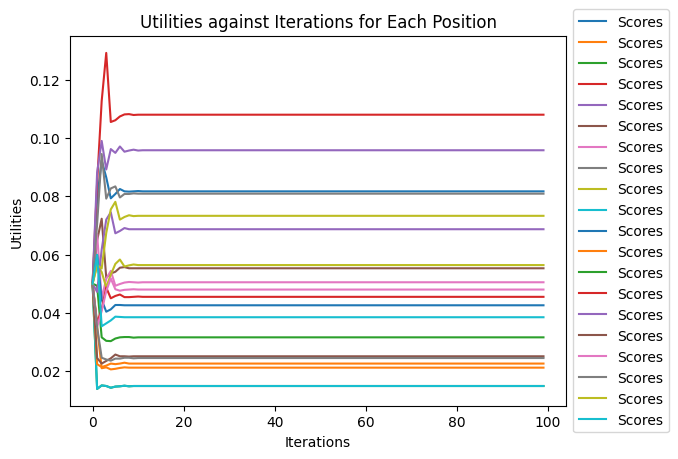

In [28]:
plot_the_scores(pagerank_15_percent_plot_scores)

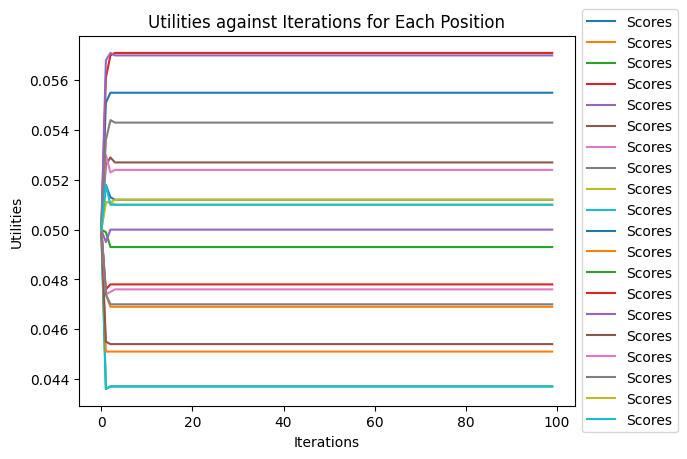

In [29]:
plot_the_scores(pagerank_85_percent_plot_scores)

## Distribution vector E

In [30]:
def compute_boredom_distribution_linearly(num_nodes):
    E = np.linspace(0.0, 1.0, num_nodes)
    E = E / E.sum()
    return E

In [31]:
E = np.ones(adjacency_matrix.shape[0]) / adjacency_matrix.shape[0]
pagerank_average_e, pagerank_average_e_plot_scores, pagerank_average_e_no_of_iteration = modified_page_rank(adjacency_matrix, 0.15, E)
print(f"closed form 1: {pagerank_average_e}")
print(f"closed form 2: {pagerank_average_e.sum()}")
print(f"b_no_of_iterations: {pagerank_average_e_no_of_iteration}")

E = compute_boredom_distribution_linearly(adjacency_matrix.shape[0])
pagerank_linear_e, pagerank_linear_e_plot_scores, pagerank_linear_e_no_of_iteration = modified_page_rank(adjacency_matrix, 0.15, E)
print(f"closed form 1: {pagerank_linear_e}")
print(f"closed form 2: {pagerank_linear_e.sum()}")
print(f"c_no_of_iterations: {pagerank_linear_e_no_of_iteration}")


filename = "./results/distribution_vector_experiment.txt"
with open(filename, 'w') as f:
    print("=== average ===", file=f)
    print(f"closed form 1: {pagerank_average_e}", file=f)
    print(f"closed form 2: {pagerank_average_e.sum()}", file=f)
    print(f"max value: {np.max(pagerank_average_e.round(6))}", file=f)
    print(f"mean value: {np.mean(pagerank_average_e)}", file=f)
    print(f"standard deviation: {np.std(pagerank_average_e)}", file=f)
    print(f"no_of_iterations: {pagerank_average_e_no_of_iteration}", file=f)
    print("\n")
    print("=== linear ===", file=f)
    print(f"closed form 1: {pagerank_linear_e}", file=f)
    print(f"closed form 2: {pagerank_linear_e.sum()}", file=f)
    print(f"max value: {np.max(pagerank_linear_e.round(6))}", file=f)
    print(f"mean value: {np.mean(pagerank_linear_e)}", file=f)
    print(f"standard deviation: {np.std(pagerank_linear_e)}", file=f)
    print(f"no_of_iterations: {pagerank_linear_e_no_of_iteration}", file=f)

initial page_rank_scores:[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
closed form 1: [0.08173544 0.02119031 0.01487042 0.10799243 0.09580976 0.05533703
 0.05045835 0.08091833 0.05641838 0.01487042 0.04258416 0.02261205
 0.03158516 0.04553874 0.06871872 0.02507538 0.04802353 0.0244805
 0.07328095 0.03849992]
closed form 2: 1.0
b_no_of_iterations: 17
initial page_rank_scores:[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
closed form 1: [0.07564731 0.01411946 0.00881417 0.10011836 0.09559825 0.05766523
 0.04308816 0.07081974 0.0605239  0.01434048 0.04782665 0.02361327
 0.0352954  0.04525783 0.06869039 0.0301791  0.05224382 0.03069199
 0.07983262 0.04563386]
closed form 2: 0.9999999999999998
c_no_of_iterations: 18




# Map reduce

In [32]:
adjacency_list = create_adjacency_list_replace(nodes, edges)

dead_nodes:[1, 4, 8]


In [33]:
adjacency_list

{0: [7, 14, 3],
 1: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 2: [19, 6],
 3: [16, 6, 4, 14],
 4: [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 5: [3],
 6: [7],
 7: [3, 13, 0],
 8: [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 9: [1, 6],
 10: [0],
 11: [12, 17],
 12: [4],
 13: [14, 5, 11, 0, 13],
 14: [18],
 15: [10, 12, 19],
 16: [19, 15, 19, 16, 10, 15],
 17: [8, 10],
 18: [4, 8],
 19: [5]}

In [34]:
def mapper(damping_factor, nodes, pagerank, new_pagerank):
    for node, neighbors in nodes.items():
        for neighbor in neighbors:
            contribution = damping_factor * pagerank[node] / len(neighbors)
            new_pagerank[neighbor] += contribution
    return new_pagerank

def reducer(damping_factor, nodes, pagerank, new_pagerank, N):
    for node in nodes:
        pagerank[node] = new_pagerank.get(node, 0) + (1 - damping_factor) / N
    return pagerank

def calculate_pagerank(nodes, damping_factor=0.85, num_iterations=10):
    N = len(nodes)
    initial_pr = 1 / N
    pagerank = {node: initial_pr for node in nodes}

    for _ in range(num_iterations):
        new_pagerank = {node: 0 for node in nodes}
        # mapper 
        new_pagerank = mapper(damping_factor, nodes, pagerank, new_pagerank)
        # reducer
        pagerank = reducer(damping_factor, nodes, pagerank, new_pagerank, N)

    return pagerank

start_time = time.time()
pagerank_values = calculate_pagerank(adjacency_list)
time_taken = time.time() - start_time

# print the results
for node, pr in pagerank_values.items():
    print(f"Node {node}: PageRank = {pr:.4f}")
summation = sum(pagerank_values.values())
print(f"Summation: {summation}")
print(f"time_taken: {time_taken}")

Node 0: PageRank = 0.0795
Node 1: PageRank = 0.0205
Node 2: PageRank = 0.0150
Node 3: PageRank = 0.1101
Node 4: PageRank = 0.0930
Node 5: PageRank = 0.0584
Node 6: PageRank = 0.0511
Node 7: PageRank = 0.0810
Node 8: PageRank = 0.0543
Node 9: PageRank = 0.0150
Node 10: PageRank = 0.0397
Node 11: PageRank = 0.0228
Node 12: PageRank = 0.0325
Node 13: PageRank = 0.0458
Node 14: PageRank = 0.0687
Node 15: PageRank = 0.0277
Node 16: PageRank = 0.0447
Node 17: PageRank = 0.0247
Node 18: PageRank = 0.0734
Node 19: PageRank = 0.0419
Summation: 1.0
time_taken: 0.0


In [35]:
E = np.ones(adjacency_matrix.shape[0]) / adjacency_matrix.shape[0]
page_ranks, b_plot_scores, no_of_iterations = modified_page_rank(adjacency_matrix, 0.15, E)
print(f"closed form 1: {page_ranks}")
print(f"closed form 2: {page_ranks.sum()}")
print(f"no_of_iterations: {no_of_iterations}")

initial page_rank_scores:[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
closed form 1: [0.08173544 0.02119031 0.01487042 0.10799243 0.09580976 0.05533703
 0.05045835 0.08091833 0.05641838 0.01487042 0.04258416 0.02261205
 0.03158516 0.04553874 0.06871872 0.02507538 0.04802353 0.0244805
 0.07328095 0.03849992]
closed form 2: 1.0
no_of_iterations: 17
